# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Frank Xu*
Netid:  *hx44*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

In [403]:
# import libraries
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
import keras
from sklearn.datasets import make_blobs
np.random.seed(124)

In [404]:
# (a)
class Kmeans:
    def __init__(self, k = 3):
        self.k = k
        self.label = None
        self.inertia = None
        assert self.k > 0 # assert k to be larger than 0
        pass
    
    def labels(self, x, c): 
        # utility function to get an array of clustered labels given x and c
        dimension = len(x.T)
        diff = np.repeat(x, self.k, axis = 0).reshape(len(x) * self.k, dimension) - np.array(list(c)*len(x))
        dis = np.sum(diff**2, axis = 1).reshape(len(x), self.k)
        return np.array([min([(v,i) for i,v in enumerate(row)])[1] for row in dis])
    
    def single_cluster(self, x, max_iter = 50, verbose = 0): # single-time cluster
        assert max_iter > 0 # assert max_iter to be larger than 0
        if self.k > len(x): # if number of clusters is bigger than number of X, use number of X instead
            self.k = len(x)
            print('Warning: Assigned class number larger than total number of X, use number of X instead.')
        c = x[np.random.choice(x.shape[0], self.k, replace=False)] # initializing centoids by randomly choose k points from X
        label_, label = np.zeros(len(x)), np.zeros(len(x)) # initializing predicted labels by 0s
        for i in range(max_iter):
            label = self.labels(x, c) # get labels for current iteration
            if np.sum(np.abs(label_ - label)) < 2 and verbose: # early stopping till no labels change between iterations
                print('Class change less than 2 between iterations, number of iterations = {}'.format(i+1))
                break
            label_ = label
            c = np.array([np.mean(x[label == i], axis = 0) for i in range(len(c))]) # update centroids
        self.label, self.inertia = label, np.sum((x - c[label]) ** 2) # store label and inertia for each cluster trials
        return self
    
    def fit(self, x, trials = 8, max_iter = 50, verbose = 0): # function to run single-time cluster multiple times to get best result
        t0 = time.time()
        for i in range(trials):
            temp = self.single_cluster(x = x, max_iter = max_iter, verbose = verbose)
            if i == 0: # store the initial result
                best_label, best_inertia = temp.label, temp.inertia
            else: # update if better
                if temp.inertia < best_inertia:
                    best_label, best_inertia = temp.label, temp.inertia
            pass
        if verbose:
            print('Clustering time: {0:0.3f}s'.format(time.time()-t0))
        self.label, self.inertia = best_label, best_inertia
        return self

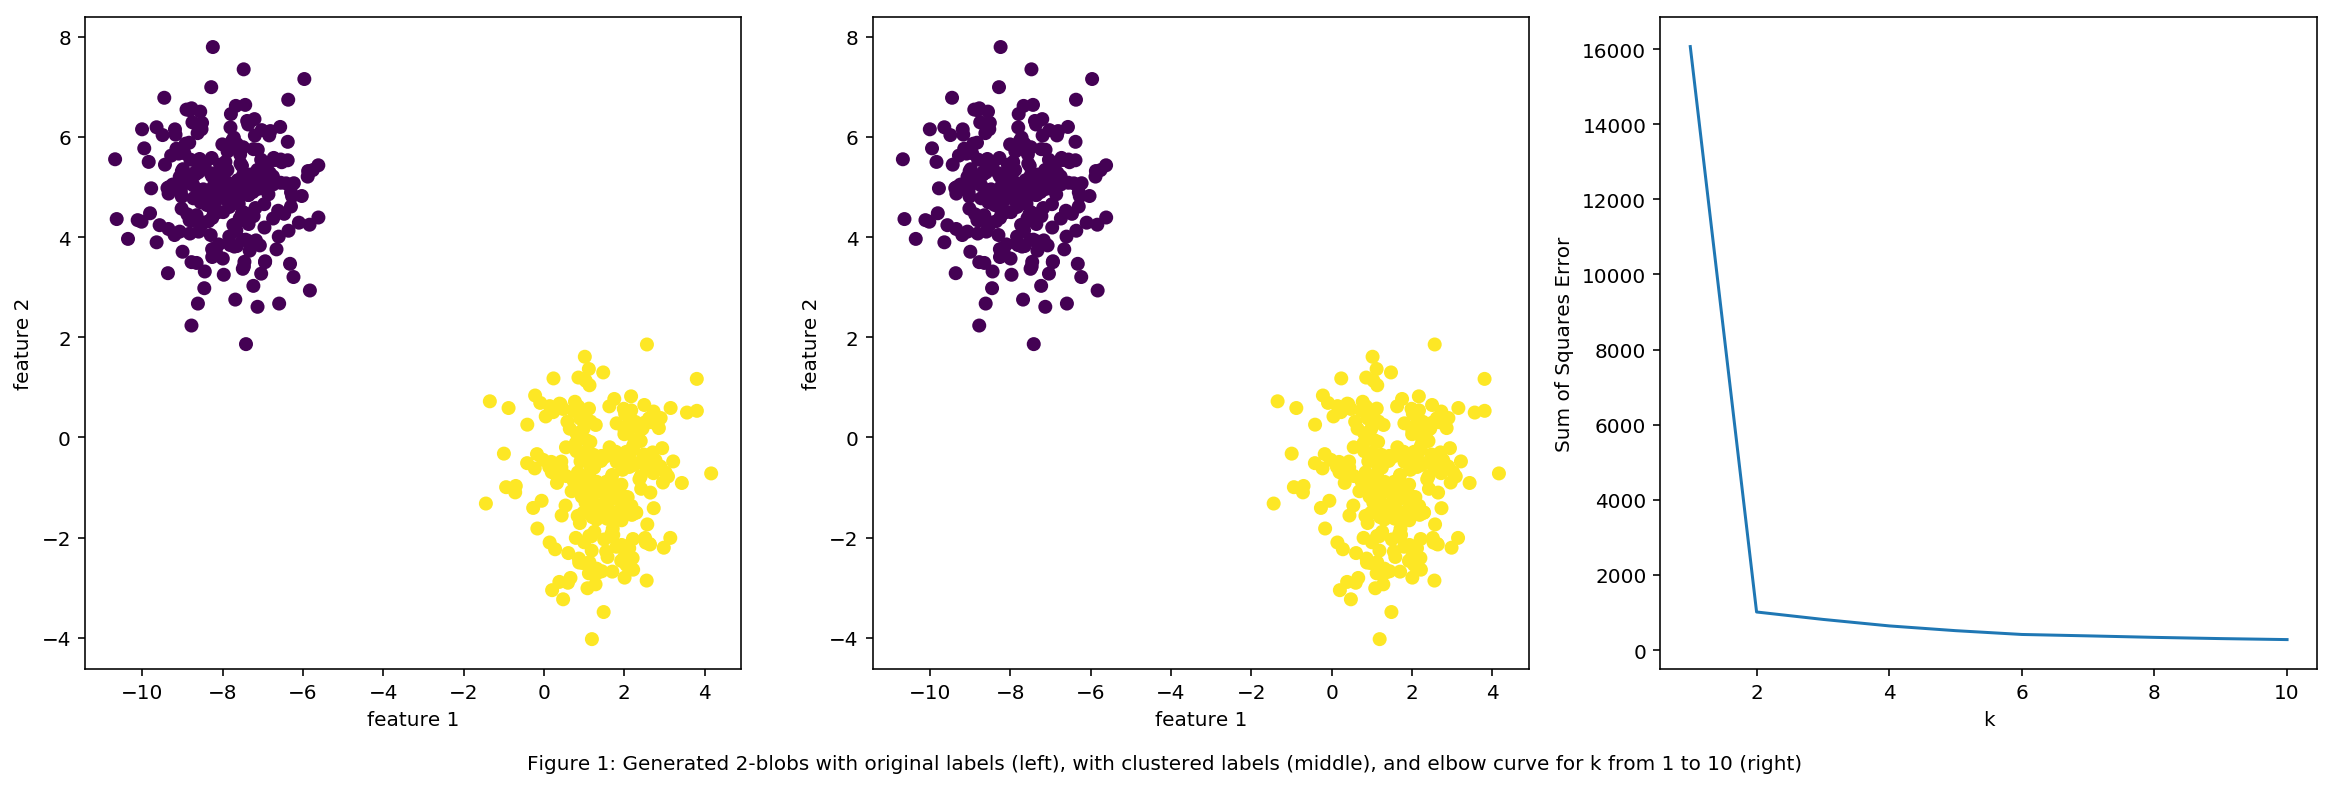

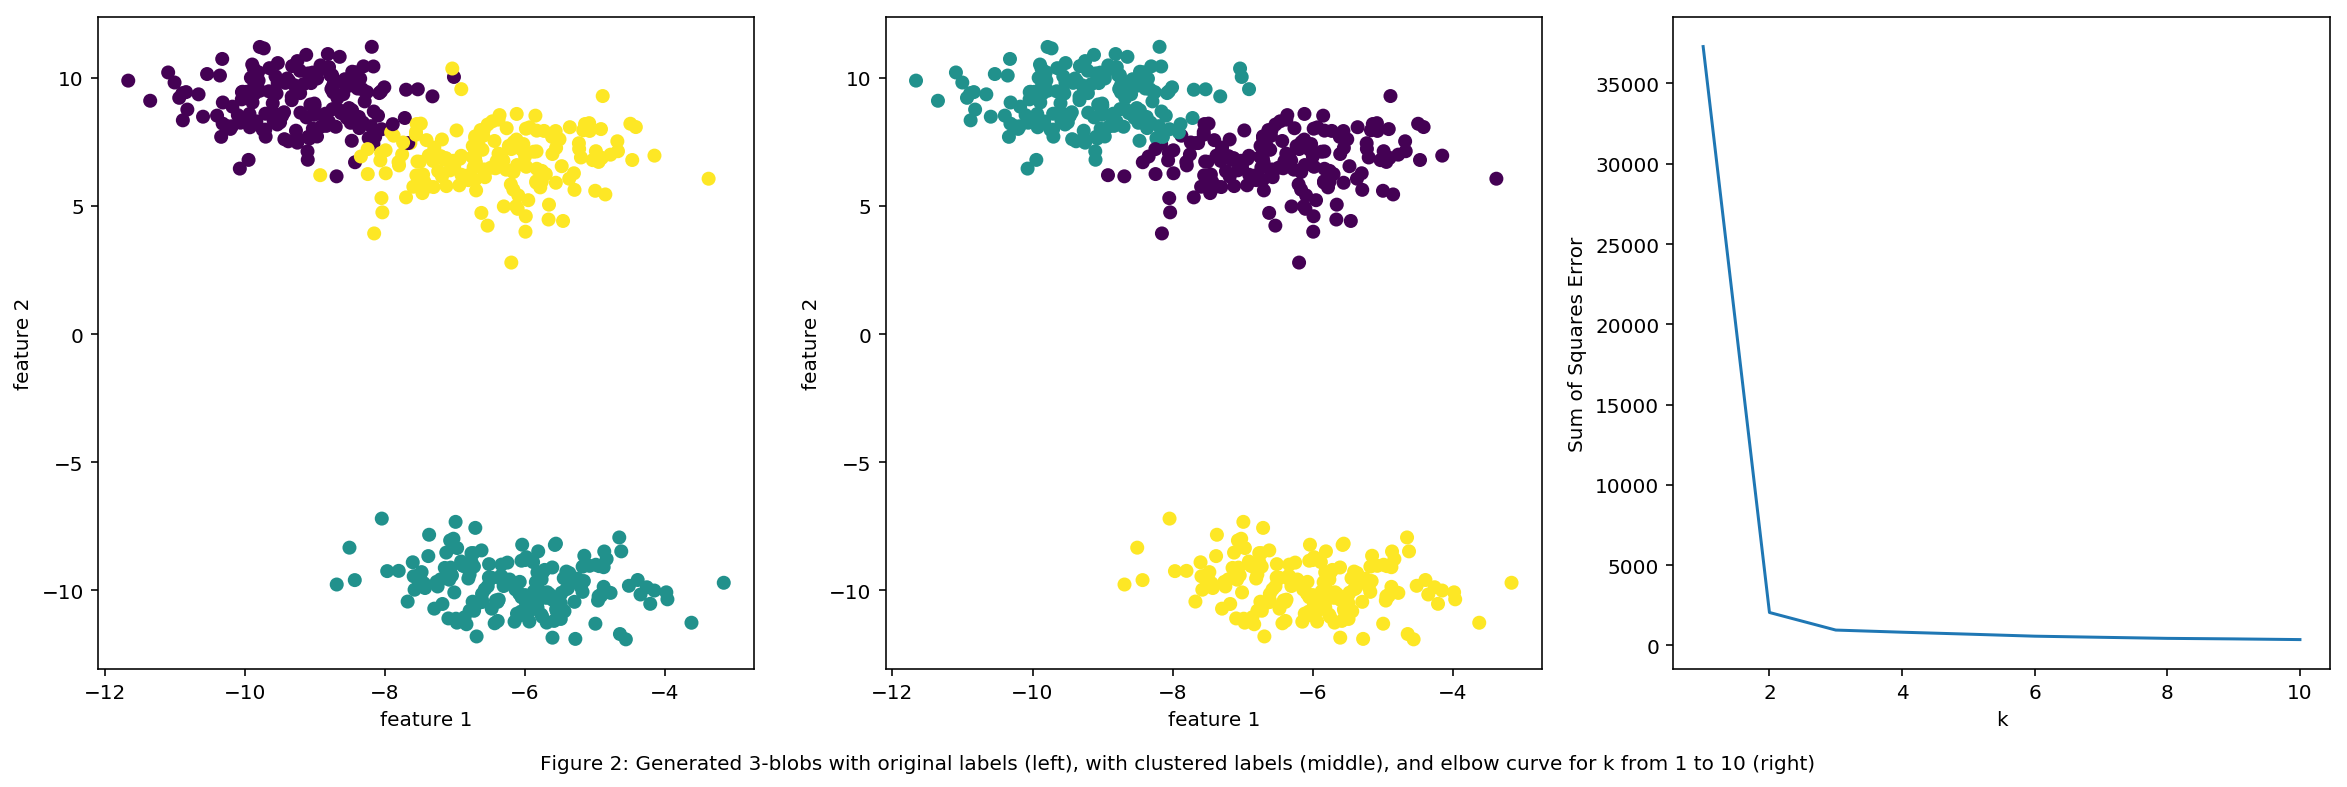

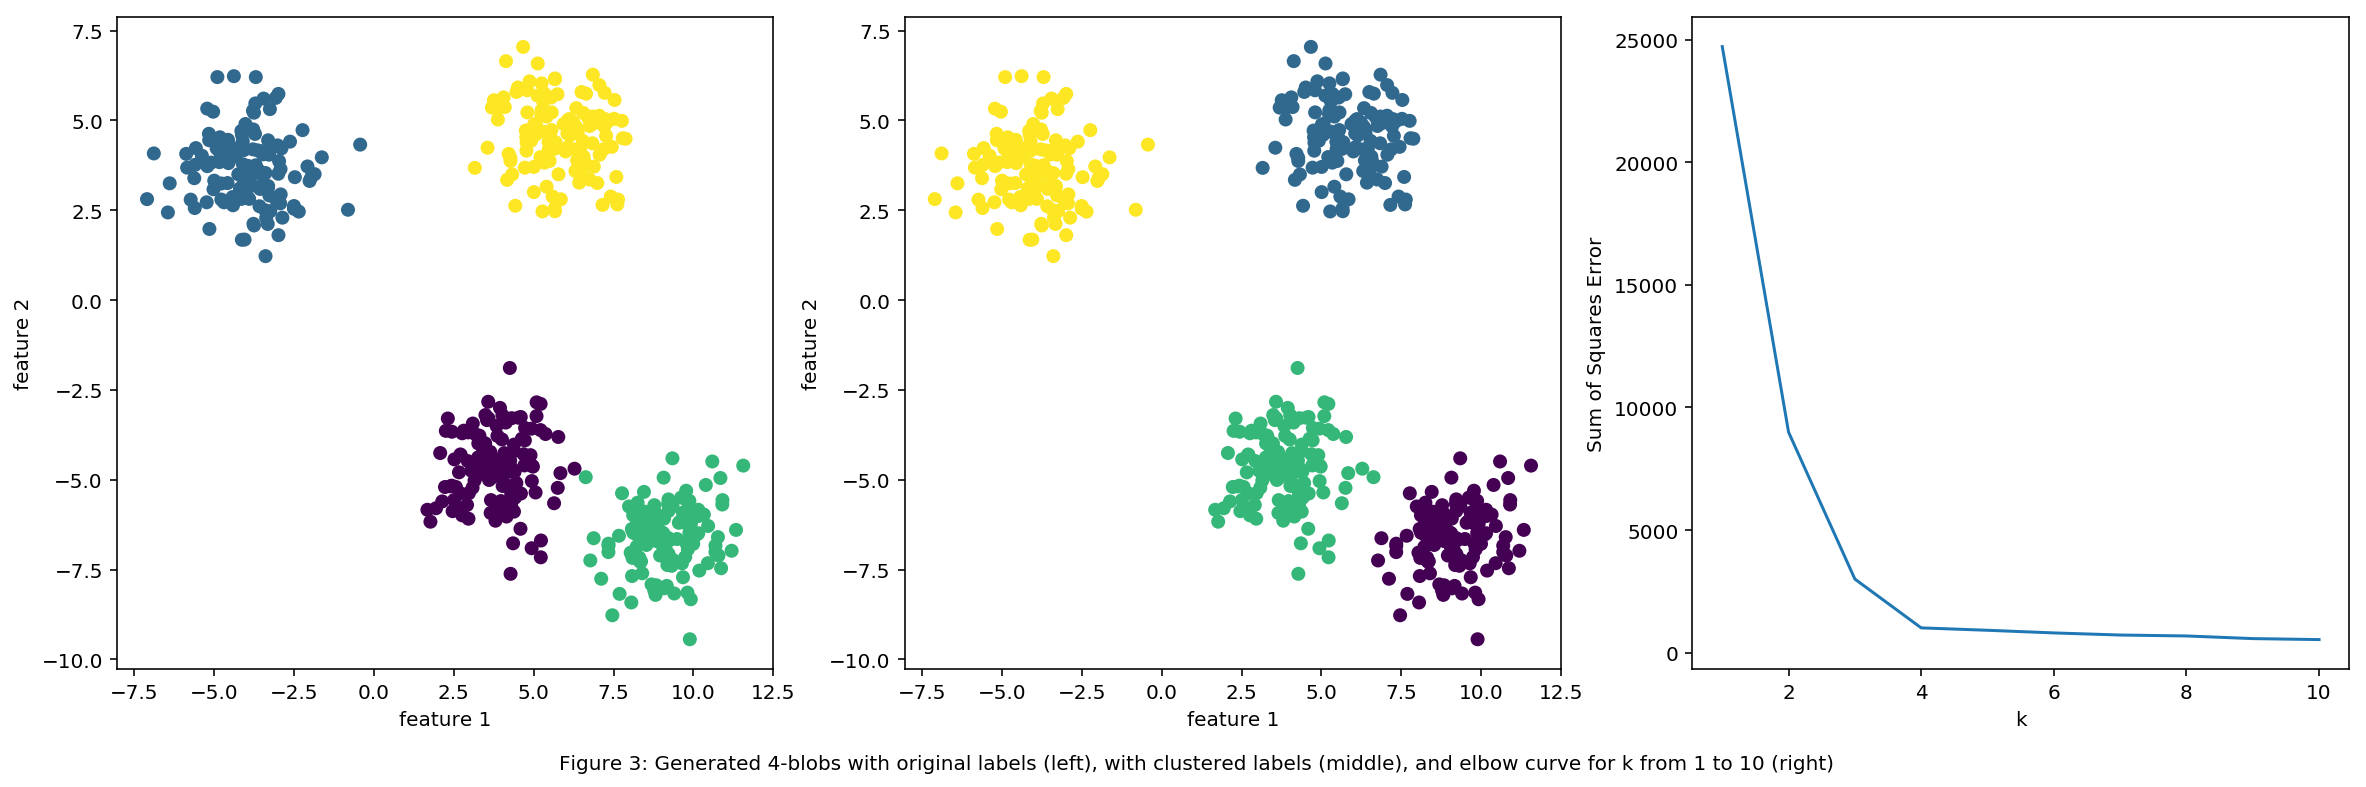

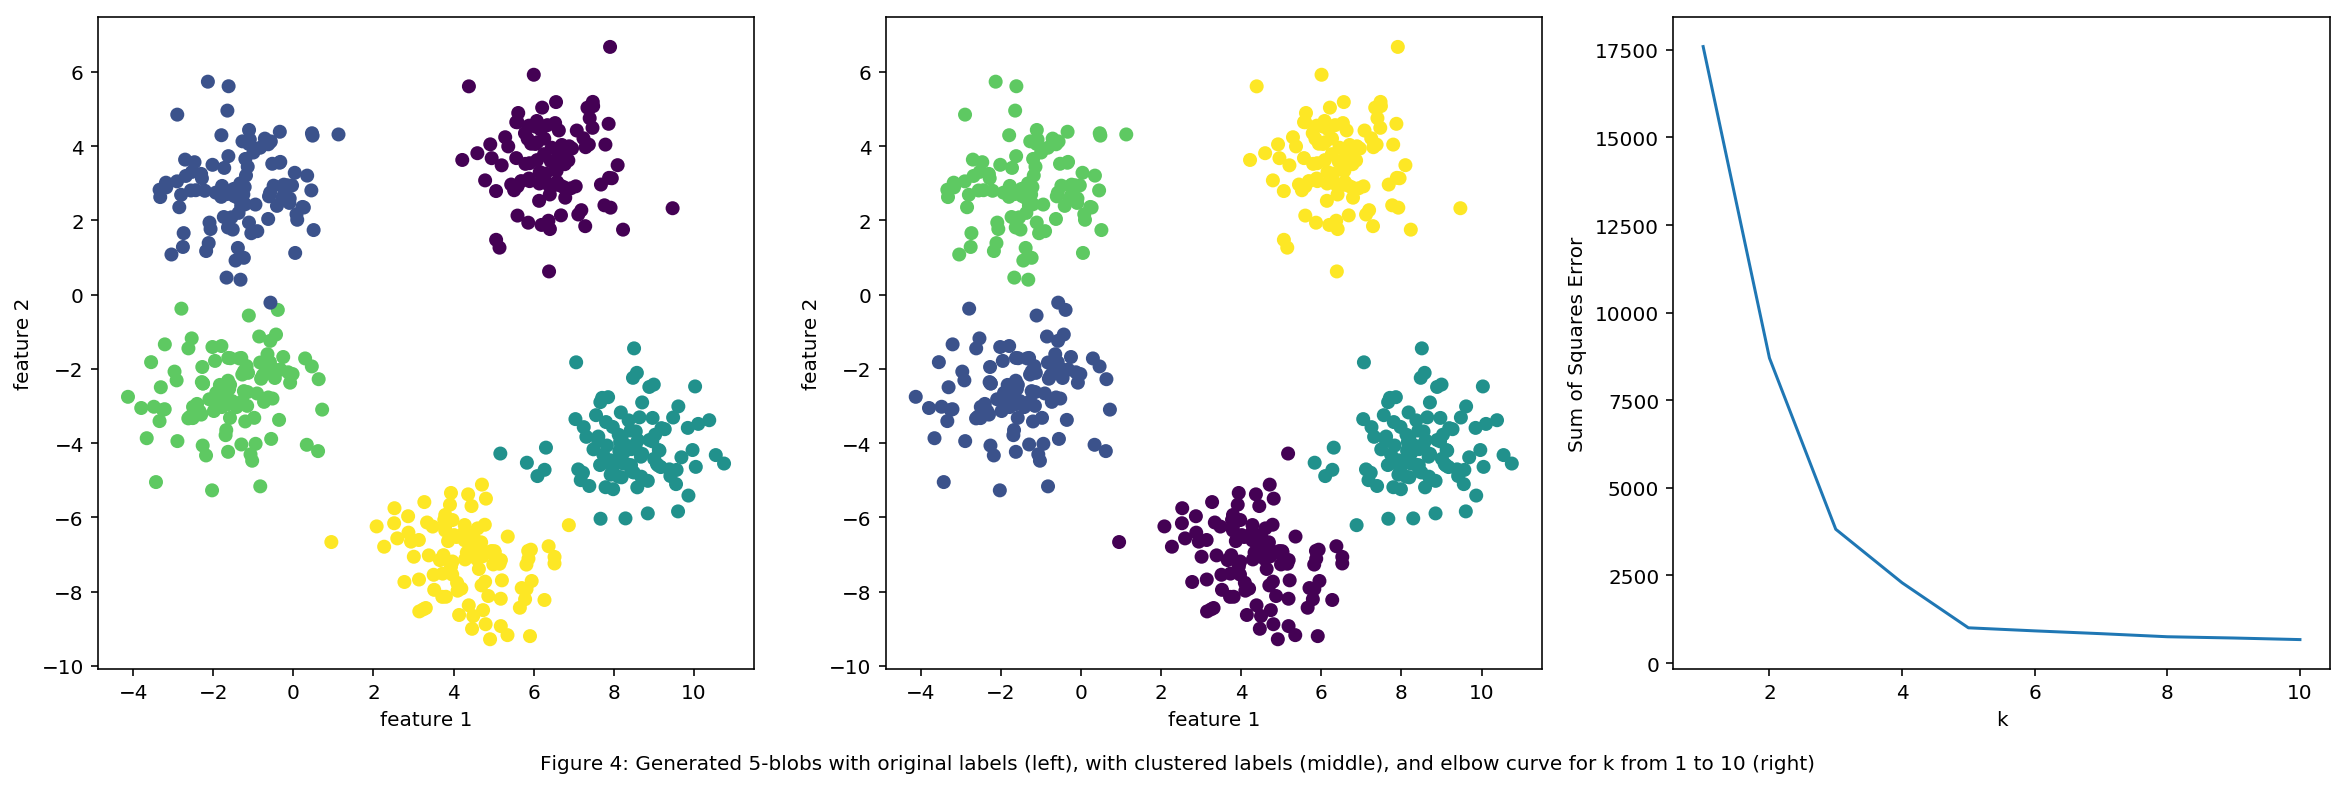

In [405]:
warnings.filterwarnings("ignore", category=RuntimeWarning) 
K = np.arange(1, 11)
for centers in range(2,6):
    X, y = make_blobs(n_samples = 500, centers = centers, n_features = 2)
    inertia = []
    for k in K:
        inertia.append(Kmeans(k).fit(X).inertia)
        pass
    fig = plt.figure(figsize=(20, 6))
    ax1, ax2, ax3 = plt.subplot(1,3,1), plt.subplot(1,3,2), plt.subplot(1,3,3)
    ax1.scatter(X.T[0], X.T[1], c = y)
    ax2.scatter(X.T[0], X.T[1], c = Kmeans(centers).fit(X).label)
    ax3.plot(K, inertia)
    ax1.set_xlabel('feature 1'); ax1.set_ylabel('feature 2'); ax2.set_xlabel('feature 1'); ax2.set_ylabel('feature 2');
    ax3.set_xlabel('k'); ax3.set_ylabel('Sum of Squares Error');
    fig.text(.5, .01, 
             'Figure {}: Generated {}-blobs with original labels (left), with clustered labels (middle), and elbow curve for k from 1 to 10 (right)'.format(centers-1, centers),
             ha='center')
    plt.show()

***(a)***

For a 2-blobs data, k = 2 is the elbow point, because the 2 clusters are well separated.

For a 3-blobs data (as shown above), k = 2 is still the elbow point, because two of those clusters actually merged together, so 2 clusters actually makes more sense than 3.

For a 4-blobs data, k = 4 is the elbow point, because the 4 clusters are well separated.

For a 5-blobs data, k = 5 is the elbow point, because the 5 clusters are well separated.

***(b)***

(1) k-means: 
It is computational simpler than most of the clustering algorithms. Struggles when cluster variance varied and non-linear. You have to set number of k in advance, and the result is not so consistent. Hard boundaries in comparison to GMM.

(2) agglomerative clustering:
It is one of the most sophisticated clustering algorithms (slower). Struggles when clusters are not well-separated. Works for non-linear. You can choose where to cut the dendrogram after went over all clusters. The result is consistent.

(3) Gaussian mixture models:
It is computational simpler than most of the clustering algorithms. Struggles when non-linear. Have to set number of clusters in advance, overall consistent. Soft boundaries (mixed membership) compared with K-means.

(4) DBSCAN:
Automatically choose number of clusters for you. Struggles with siginificant variation in cluster density. Make outliers (so the border points might not be accurate). Works with non-linear.

(5) spectral clustering:
It is one of the most sophisticated clustering algorithms (slower). Uses a different distance metric with similarity. Needs to assign number of clusters beforehand. Works with non-linear.

In [406]:
# (c)
# loading data
agg = pd.read_csv('Aggregation.txt', sep = '\t', header = None).iloc[:,0:2].values
com = pd.read_csv('Compound.txt', sep = '\t', header = None).iloc[:,0:2].values
d31 = pd.read_csv('D31.txt', sep = '\t', header = None).iloc[:,0:2].values
jai = pd.read_csv('jain.txt', sep = '\t', header = None).iloc[:,0:2].values

In [407]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

# storing predicted cluster labels
agg_lab = [
    KMeans(n_clusters = 7).fit(agg).labels_,
    AgglomerativeClustering(n_clusters = 7, linkage='average').fit(agg).labels_,
    GaussianMixture(n_components=7, covariance_type='full').fit_predict(agg),
    DBSCAN(eps=2, min_samples=8).fit(agg).labels_,
    SpectralClustering(n_clusters=7).fit(agg).labels_]

com_lab = [
    KMeans(n_clusters = 6).fit(com).labels_,
    AgglomerativeClustering(n_clusters = 6, linkage='ward').fit(com).labels_,
    GaussianMixture(n_components=6, covariance_type='full').fit_predict(com),
    DBSCAN(eps=1.5, min_samples=4).fit(com).labels_,
    SpectralClustering(n_clusters=6).fit(com).labels_]

d31_lab = [
    KMeans(n_clusters = 31).fit(d31).labels_,
    AgglomerativeClustering(n_clusters = 31, linkage='ward').fit(d31).labels_,
    GaussianMixture(n_components=31, covariance_type='full').fit_predict(d31),
    DBSCAN(eps=0.3, min_samples=1).fit(d31).labels_,
    SpectralClustering(n_clusters=31).fit(d31).labels_]

jai_lab = [
    KMeans(n_clusters = 2).fit(jai).labels_,
    AgglomerativeClustering(n_clusters = 2, linkage='complete').fit(jai).labels_,
    GaussianMixture(n_components=2, covariance_type='tied').fit_predict(jai),
    DBSCAN(eps=2.5, min_samples=20).fit(jai).labels_,
    SpectralClustering(n_clusters=2).fit(jai).labels_]

# some utility lists for plotting
dataset = [agg, com, d31, jai]
labels = [agg_lab, com_lab, d31_lab, jai_lab]
methods = ['KMeans', 'Agglomerative', 'GMM', 'DBSCAN', 'Spectral']
dataname = ['Aggregation', 'Compound', 'D31', 'Jain']

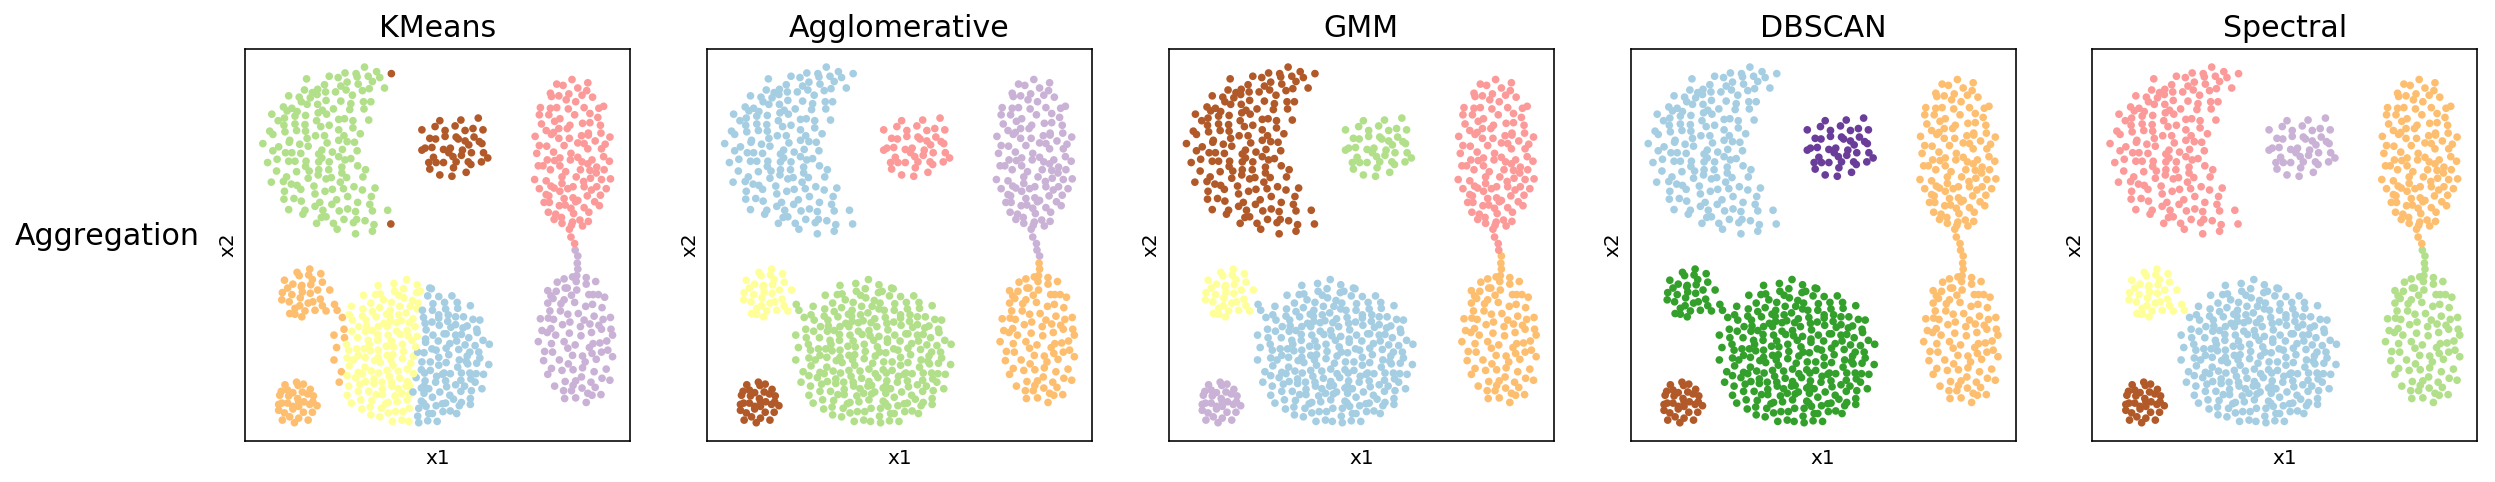

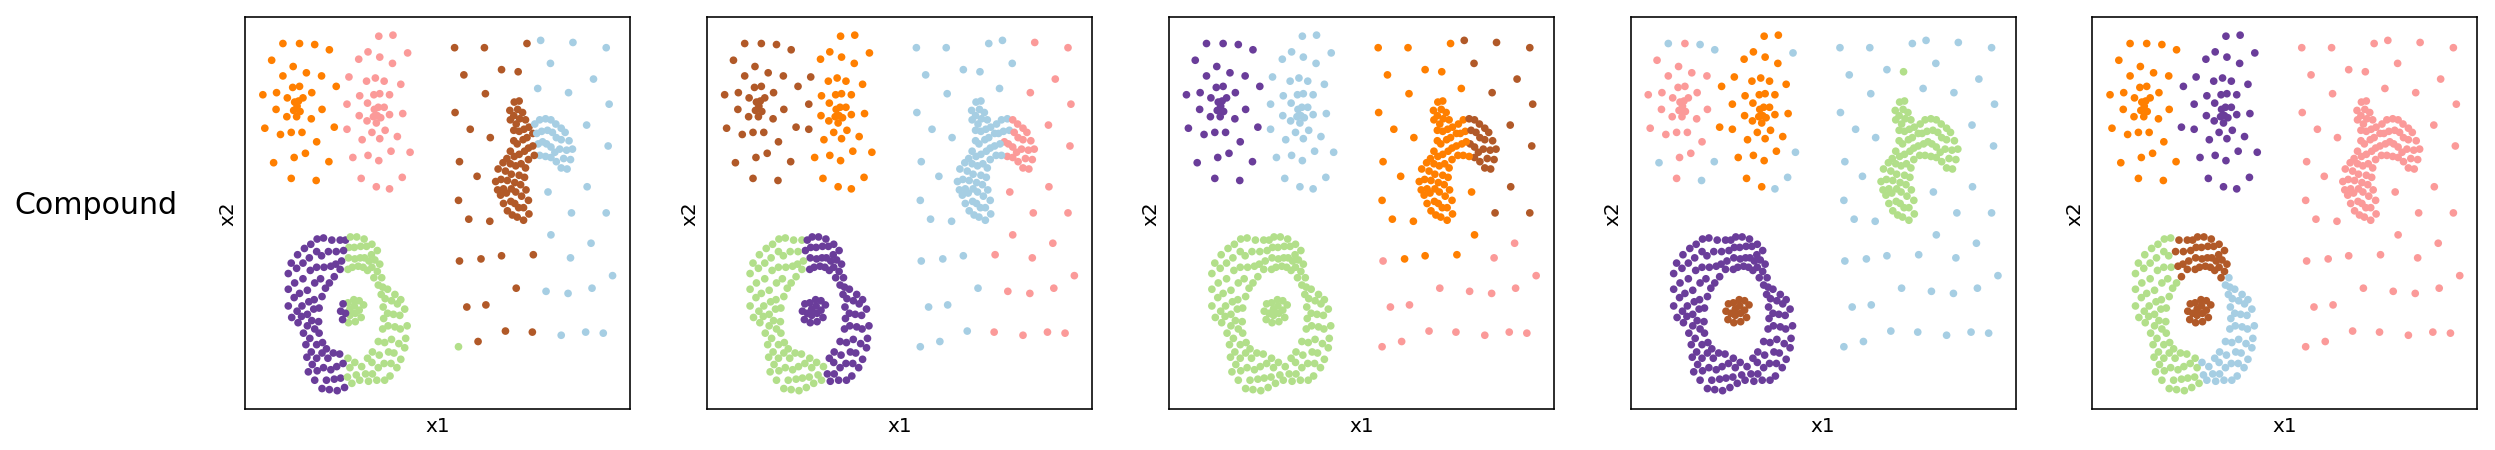

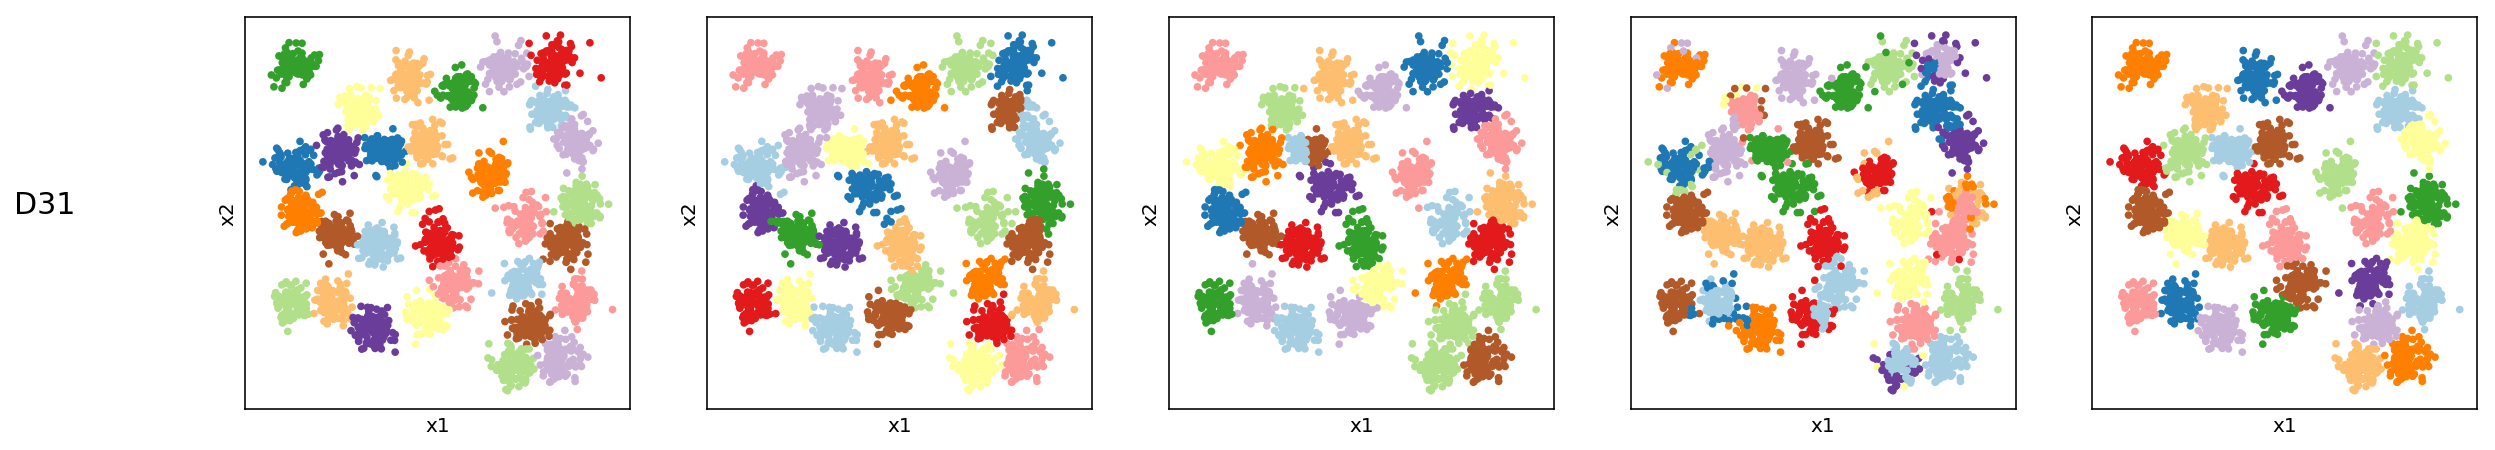

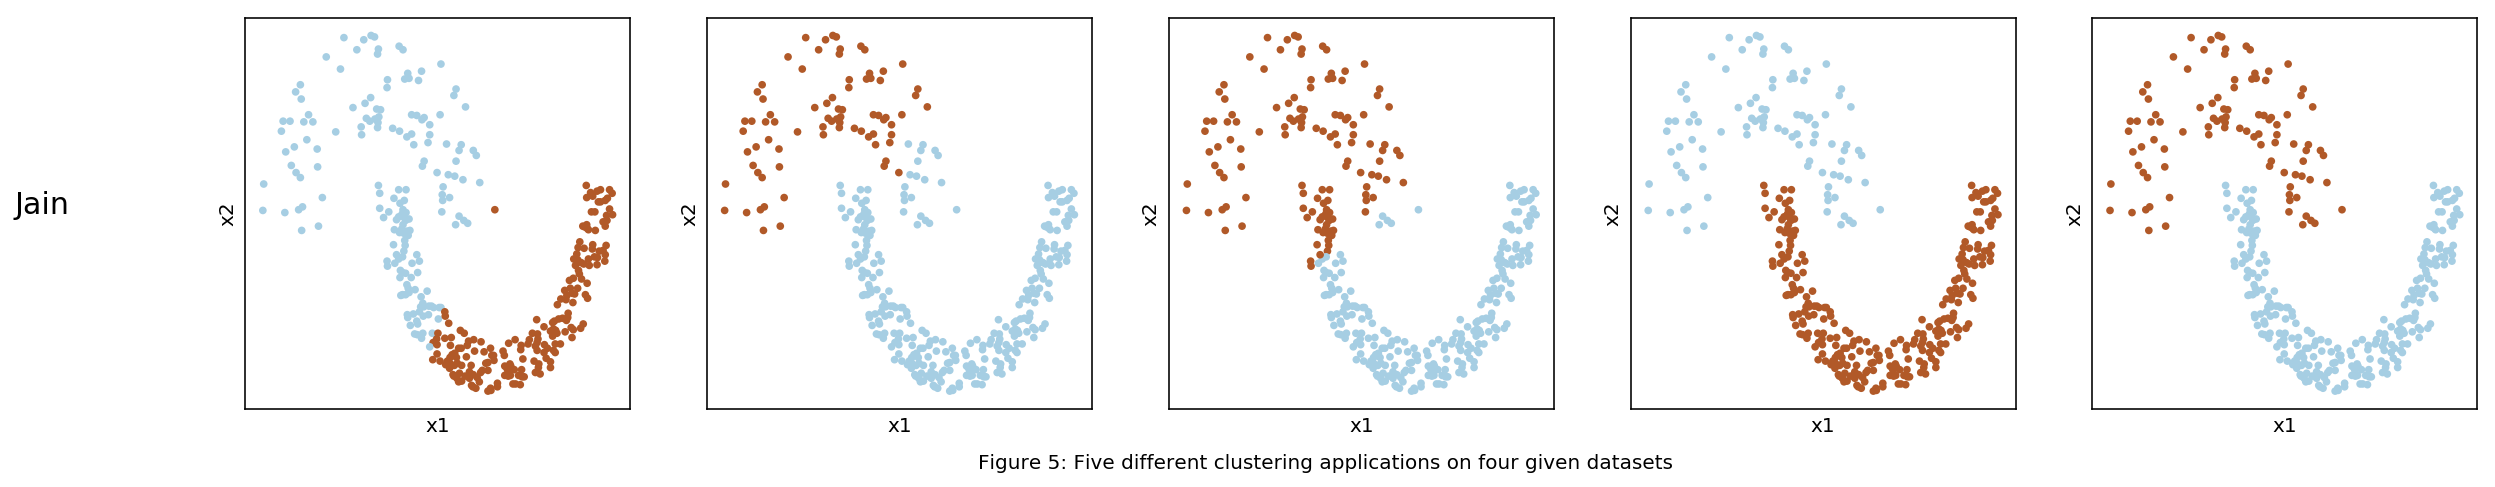

In [409]:
# plotting
for i, lab in enumerate(labels):
    fig = plt.figure(figsize=(20, 3.6))
    data = dataset[i]
    for idx, label in enumerate(lab):
        plt.subplot(1,5,idx+1)
        plt.scatter(data.T[0], data.T[1], c = label, cmap = 'Paired', s = 8)
        plt.xticks([]); plt.yticks([])
        plt.xlabel('x1'); plt.ylabel('x2')
        if i == 0:
            plt.title(methods[idx], size=15)
        if idx == 0:
             plt.text(-.6, .5, dataname[i], transform=plt.gca().transAxes, size=15, horizontalalignment='left')
fig.text(.5, .01, 'Figure 5: Five different clustering applications on four given datasets', ha='center')
plt.show()

***(c)***

Given the performance of five different clustering applications above:

For the ***Aggregation*** dataset, ***Agglomerative*** and ***Spectral*** gave the best output. The ***difference in variance*** killed KMeans and GMM, and the ***connection between groups*** greatly affected DBSCAN.

For the ***Compound*** dataset, ***DBSCAN*** gave the best output. The ***Non-linearity*** killed KMeans and GMM, while the ***outliers*** greatly affected Spectral and Agglomerative. DBSCAN is great in dealing with outliers.

For the ***D31*** dataset, ***all methods other than DBSCAN*** gave the best output. The dataset is well separated, linear, and consistent in variance. However, DBSCAN can have trouble in telling points on the boarder.

For the ***Jain*** dataset, ***DBSCAN and Spectral*** gave the best output. The ***Non-linearity*** killed KMeans and GMM, and the ***not so well separated*** points affected Agglomerative.

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

In [28]:
# (a)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x = x_train.reshape(60000, 28*28)

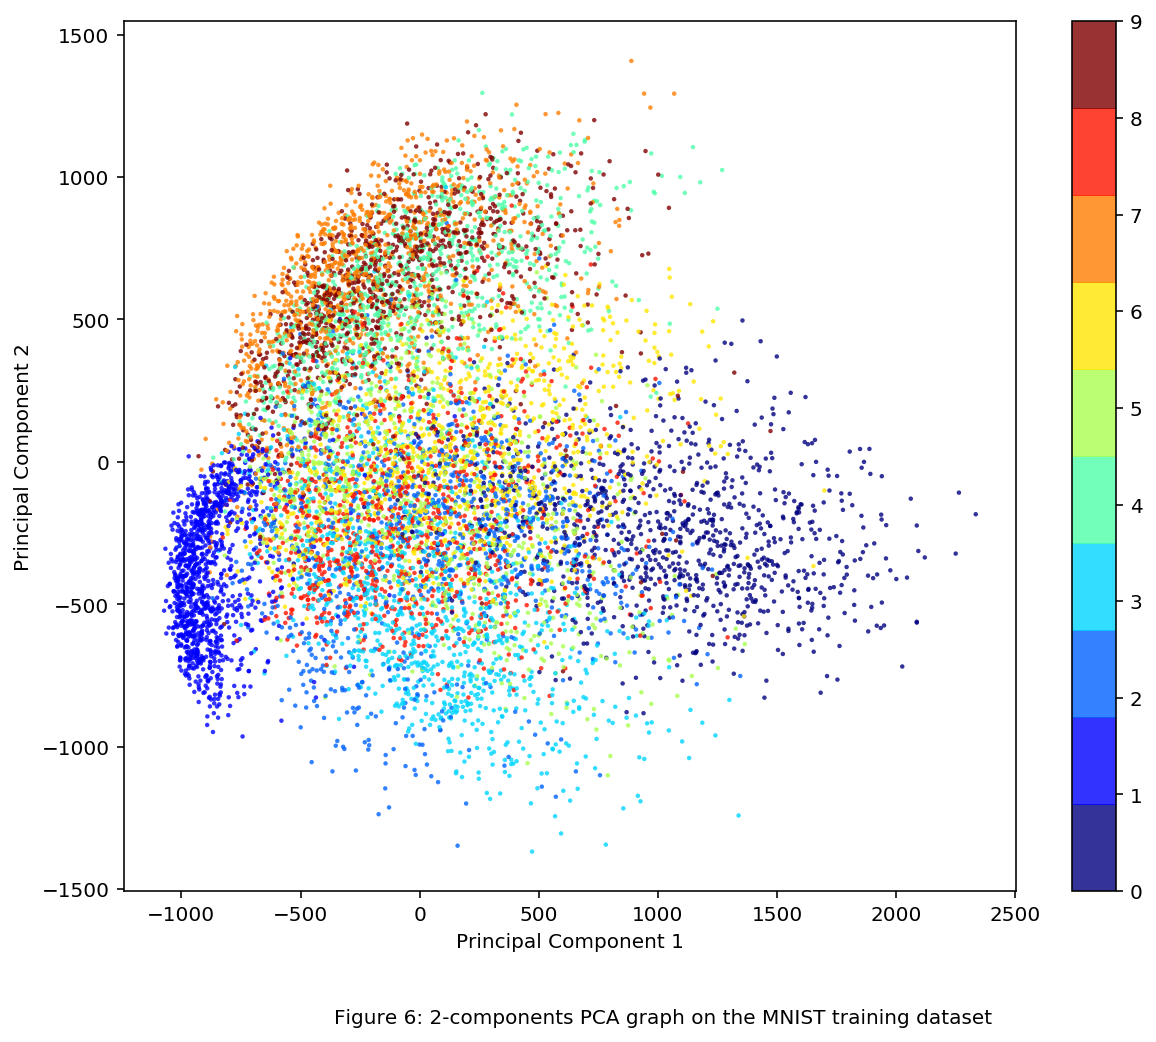

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(x[0:10000])

fig = plt.figure(figsize = (10,8))
plt.scatter(pca.T[0], pca.T[1], c = y_train[0:10000], cmap=plt.get_cmap('jet', 10), edgecolor='none', alpha = 0.8, s = 5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
fig.text(.5, .01, 'Figure 6: 2-components PCA graph on the MNIST training dataset', ha='center')
plt.show()

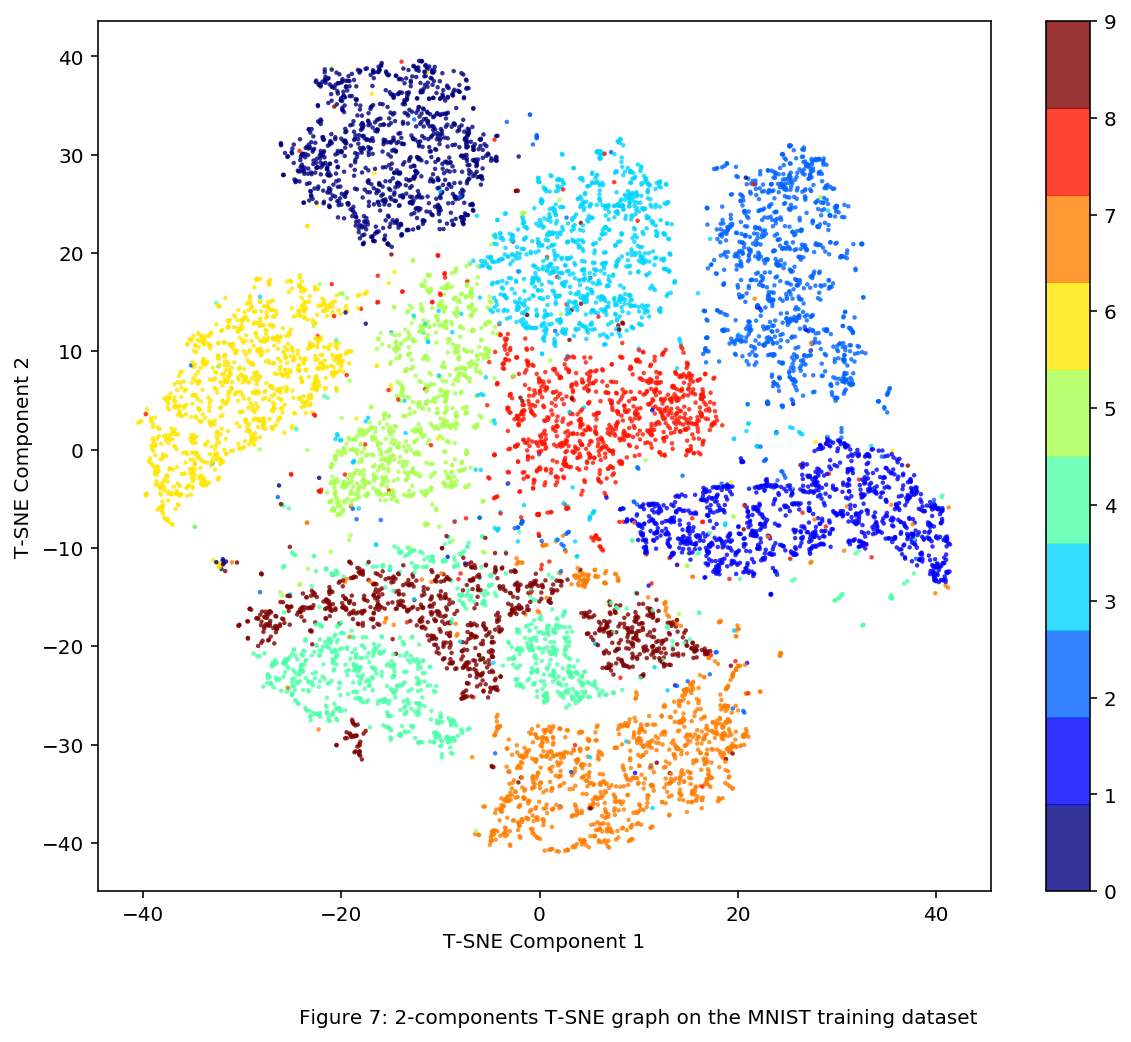

In [30]:
# (b)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', angle = 0.6, n_iter = 500).fit_transform(x[0:10000])
fig = plt.figure(figsize = (10,8))
plt.scatter(tsne.T[0], tsne.T[1], c = y_train[0:10000], cmap=plt.get_cmap('jet', 10), edgecolor='none', alpha = 0.8, s = 5)
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.colorbar()
fig.text(.5, .01, 'Figure 7: 2-components T-SNE graph on the MNIST training dataset', ha='center')
plt.show()

***(c)***

Compared with PCA, T-SNE seems to cluster the data better: most of the labels in T-SNE are clearly separated, except for 9 and 4, which is reasonable intuitively; also, 3 and 5 seems close to each other, but mostly identifiable. However in PCA, only 1 is clearly clustered on the bottom left, 0 is quite identifiable on bottom right, 2 and 3 mixed on the bottom middle, 4/7/9 mixed on the top, 3/5/6 in the middle. 

Given the observation, the pro of PCA is that it is extremely fast (since it is basically just calculating the eigenvectors), and the con is that it is not well separated in comparison to T-SNE. When we don't have the labels (colors), we cannot tell most clusters.

The pro of T-SNE, however, is the very well-separated clusters, we can observe the clusters even without the labels given. The con can be it takes too much time, it takes O(NlogN) time according to document. This is also the reason that I only use 10000 obs. of data for this method.

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

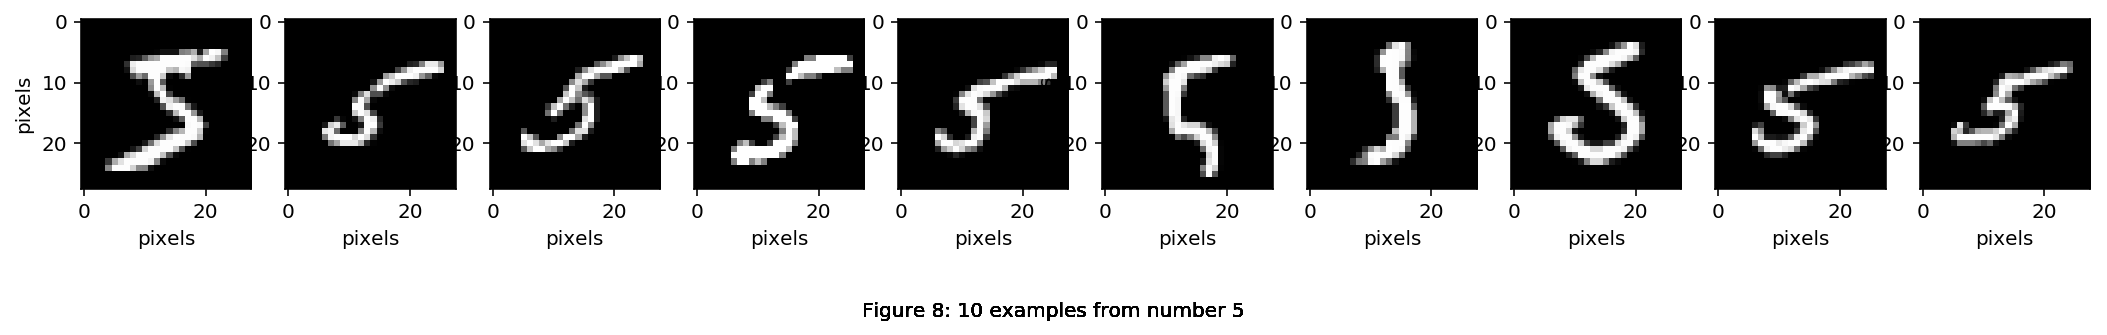

In [46]:
# (a)
x_5 = x_train[y_train == 5]
fig = plt.figure(figsize=(18, 3))
for i in range(0,10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_5[i], cmap='gray')
    plt.xlabel("pixels") 
    plt.ylabel("pixels") 
    fig.text(.5, .01, 'Figure 8: 10 examples from number 5', ha='center')
plt.show()

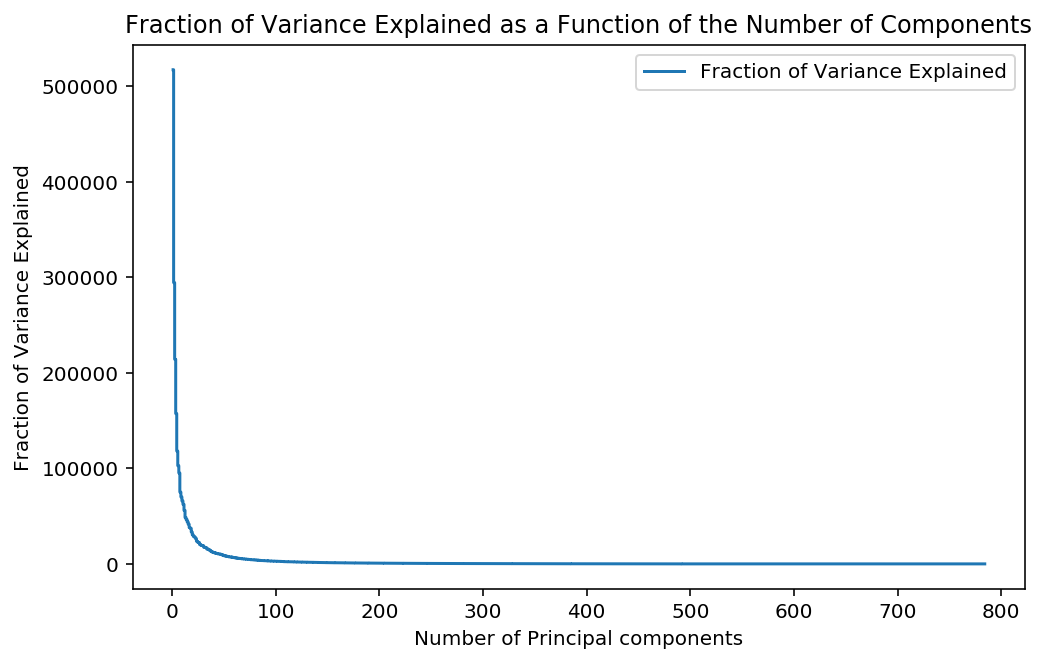

In [70]:
# (b)
pca = PCA().fit(x_5.reshape(5421,28*28))
plt.figure(figsize=(8, 5))
plt.step(range(1, 785), pca.explained_variance_, where='mid',label='Fraction of Variance Explained')
plt.title('Fraction of Variance Explained as a Function of the Number of Components')
plt.ylabel('Fraction of Variance Explained')
plt.xlabel('Number of Principal components')
plt.legend(loc='best')
plt.show()

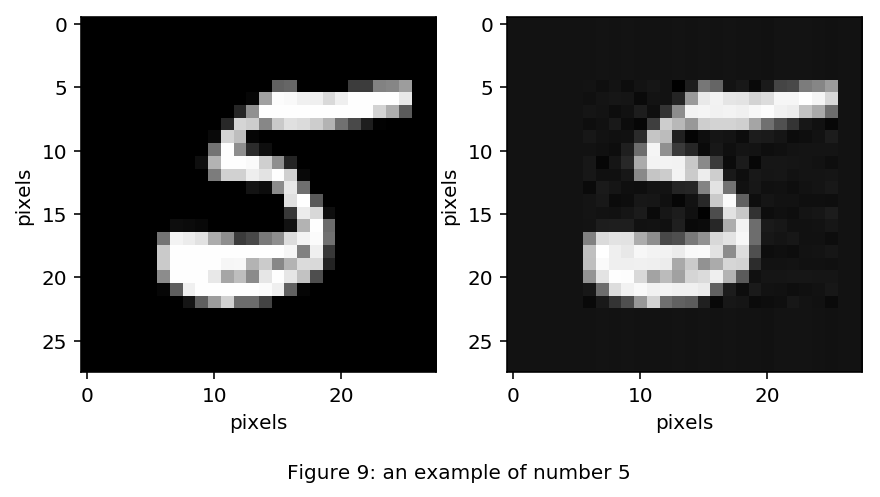

In [72]:
# (c)
x = x_5[100]
pca = PCA(n_components=10)
compressed = pca.fit_transform(x)
x_trans = pca.inverse_transform(compressed)

fig = plt.figure(figsize=(7, 4))
plt.subplot(1,2,1)
plt.imshow(x, cmap='gray')
plt.xlabel("pixels") 
plt.ylabel("pixels") 
plt.subplot(1,2,2)
plt.imshow(x_trans, cmap='gray')
plt.xlabel("pixels") 
plt.ylabel("pixels") 
fig.text(.5, .01, 'Figure 9: an example of number 5', ha='center')
plt.show()

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

In [656]:
# (a)

class NN:
    def __init__(self, structure = [2,5,5,1]):
        assert len(structure) >= 3
        self.weights = []
        self.input_num = structure[0]
        for i, j in zip(structure[1:], structure[0:-1]):
            self.weights.append(np.random.random_sample(size = (i,j)))
        self.structure = structure
        self.output_raw = None
        self.output = None
        self.delta = None
        self.deriv = None
        self.loss = None
        pass
    
    def reg(self, x, w):
        assert w.shape[1] == x.shape[0]
        return np.dot(w, x.T)
    
    def sig(self, a):
        return 1 / (1 + np.exp(-a))
    
    def sig_deriv(self, o):
        return o * (1 - o)
    
    def fp(self, x):
        x = np.array(x)
        assert self.input_num == x.shape[0]
        self.output, self.output_raw = [x], [x]
        for layer in range(len(self.structure) - 1):
            self.output_raw.append(self.reg(x, self.weights[layer]))
            x = self.sig(self.reg(x, self.weights[layer]))
            self.output.append(x)
        return self
    
    def bp(self, y):
        y = np.array(y)
        errors, self.delta = [], []
        weights = [np.sum(i, axis = 1) for i in self.weights]
        for idx, layer in enumerate(reversed(range(1,len(self.structure)))):
            errors.append([y - self.output[-1]] if idx == 0 else np.dot(self.delta[idx-1], self.weights[layer]))
            delta = np.array(errors[idx] * self.sig_deriv(self.output_raw[layer]))
            self.delta.append(delta)
        self.delta.reverse()
        self.deriv = [np.dot(np.array([i]).T, j).T for i, j in zip(self.output_raw, self.delta)]
        return self
    
    def fit(self, X, y, lr = 0.001, epoch = 10):
        self.loss = []
        for _ in range(epoch):
            length = len(y)
            indexes = np.random.choice(np.arange(0, length), size = length, replace = False)
            for i in indexes:
                self.fp(X[i]).bp(y[i])
                self.weights = [(weight - lr * deriv) for weight, deriv in zip(self.weights, self.deriv)]
                self.loss.append((self.output[-1] - y[i])**2 / 1)
        return self
    
    def predict_proba(self, x):
        prediction = []
        for row in x:
            prediction.append(self.fp(row).output[-1])
        return np.array(prediction)

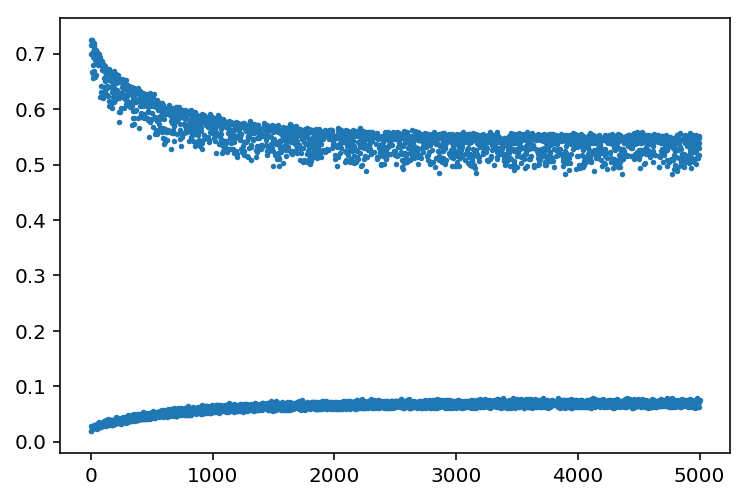

In [659]:
epoch = 10
n = NN()
plt.scatter(np.arange(500*epoch), n.fit(x_train, y_train, lr = 0.001, epoch = epoch).loss, s = 3)

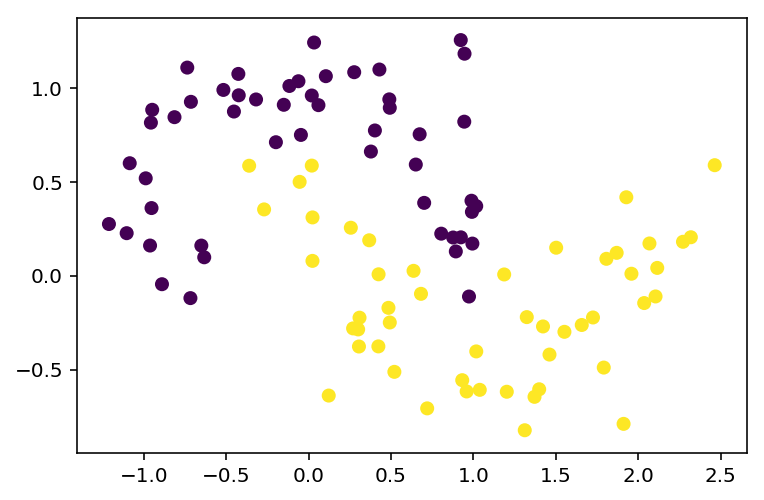

In [511]:
from sklearn.datasets import make_moons
x_train, y_train = make_moons(500, noise=0.20)
x_test, y_test = make_moons(100, noise=0.20)
plt.scatter(x_test.T[0], x_test.T[1], c = y_test)